In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seed = 180
pos_dir = '../data/pos'
neg_dir = '../data/neg'

In [3]:
# Importing Keras 
from keras.models import Sequential                          # Neural network model as a sequence of layers.
from keras.layers import Conv2D                              # Convolutional layer
from keras.layers import MaxPooling2D                        # Max pooling layer 
from keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from keras.layers import Activation                          # Layer for activation functions
from keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from keras.models import load_model                          # This helps us to load trained models
# Preprocessing layers
from keras.layers import Rescaling                           # This layer rescales pixel values

# Importing TensorFlow
import tensorflow as tf

First thing we are going to do is create a pipe for test data:

In [4]:
# Creating a Dataset for the Training data
test = tf.keras.utils.image_dataset_from_directory(
    "../data2/test",  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['pos', 'neg'], #extensions of the folders holding the classes
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (400, 400), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

Found 3629 files belonging to 2 classes.


In [5]:
file_paths = test.file_paths

In [6]:
scaler = Rescaling(1./255) # Defining scaler values between 0 to 1
test = test.map(lambda x, y: (scaler(x), y)) # Rescaling datasets

In [7]:
# Checking minimum and maximum pixel values in the training dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in test:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)
    
    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())
    
print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 1.0


In [8]:
model = tf.keras.models.load_model('safety_gear_detect_V3.keras')

# Show the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 400, 400, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 400, 400, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 400, 400, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 200, 200, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 200, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200, 200, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200, 200, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100, 100, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100, 100, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 50, 50, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50, 50, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 25, 25, 512)    │             

 Total params: 358,688,198 (1.34 GB)

 Trainable params: 179,343,106 (684.14 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 179,343,108 (684.14 MB)

In [9]:
preds = model.predict(test)  # Running model on the test dataset
val_loss, val_acc = model.evaluate(test) # Obtaining Loss and Accuracy on the val dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

227/227 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.7579 - loss: 3.1067

Validation Loss:  3.339996337890625

Validation Accuracy:  75.0 %


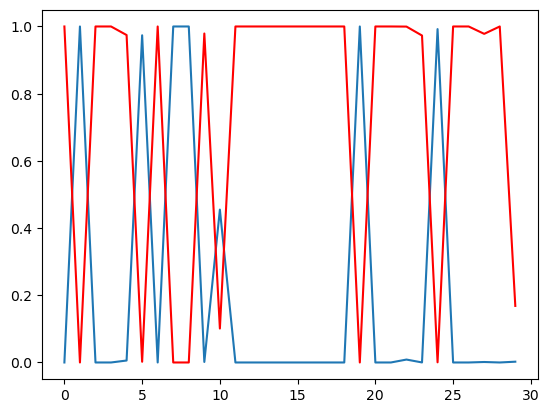

In [10]:
plt.plot(preds[:30,0])
plt.plot(preds[:30,1], color='r')

In [11]:
df_results = pd.DataFrame({'name':file_paths, 'pos':preds[:,0], 'neg':preds[:,1]})

In [12]:
df_results.describe()

,pos,neg
count,3.629000e+03,3.629000e+03
mean,2.795489e-01,6.974179e-01
std,4.289444e-01,4.394271e-01
min,0.000000e+00,8.374666e-20
25%,1.202927e-10,4.186853e-02
50%,1.754035e-05,9.999555e-01
75%,8.692803e-01,1.000000e+00
max,1.000000e+00,1.000000e+00


In [13]:
from PIL import Image
def pred_image(im_name):
    # Loading the image
    image_path = '../data2/test/' + im_name
    original_image = Image.open(image_path)
    print('Picture of safety gear: \n')
    plt.imshow(original_image)
    
    # Manually preprocessing image as we did when training
    preprocessed_image = original_image.resize((400, 400))
    preprocessed_image = np.array(preprocessed_image) / 255.0

    predic = model.predict(np.expand_dims(preprocessed_image, axis = 0))
    labels = ['pos', 'neg']

    preds_class = np.argmax(predic)
    preds_label = labels[preds_class]

    print(f'\nPredicted Class: {preds_label}')
    print(f'\nConfidence Score: {predic[0][preds_class]}')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step

Predicted Class: pos

Confidence Score: 0.9999998807907104


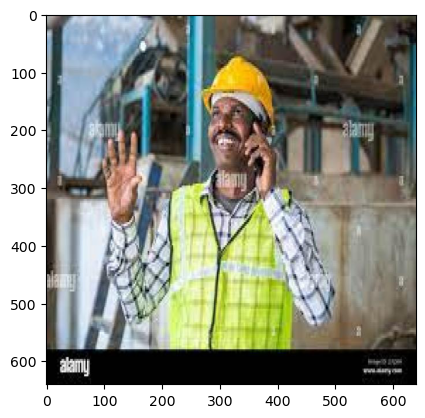

In [14]:
pred_image('pos/helmet_jacket_07350.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step

Predicted Class: neg

Confidence Score: 0.9999988079071045


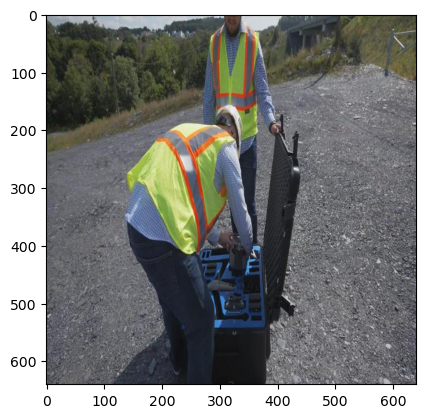

In [15]:
pred_image('pos/helmet_jacket_07353.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step

Predicted Class: pos

Confidence Score: 1.0


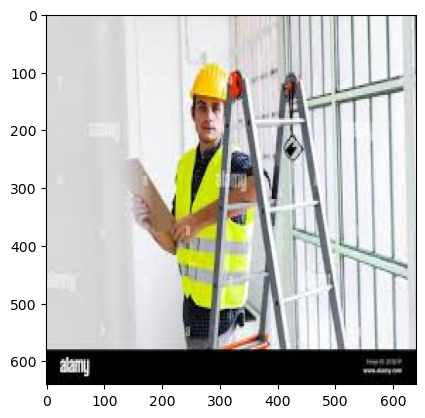

In [16]:
pred_image('pos/helmet_jacket_07355.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step

Predicted Class: pos

Confidence Score: 0.9999984502792358


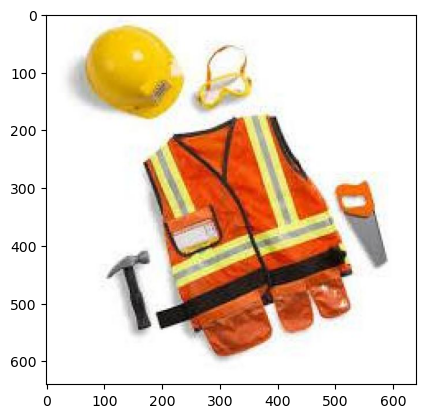

In [17]:
pred_image('pos/helmet_jacket_07360.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step

Predicted Class: neg

Confidence Score: 1.0


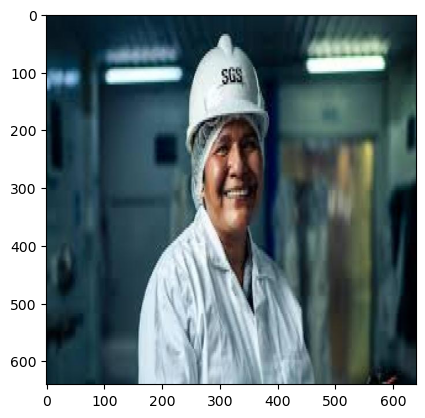

In [18]:
pred_image('pos/helmet_jacket_07361.jpg')

In [19]:
df_results.iloc[0]

name    ../data2/test\neg\image_782.jpg
pos                            0.000002
neg                            0.999985
Name: 0, dtype: object

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step

Predicted Class: neg

Confidence Score: 0.9998207688331604


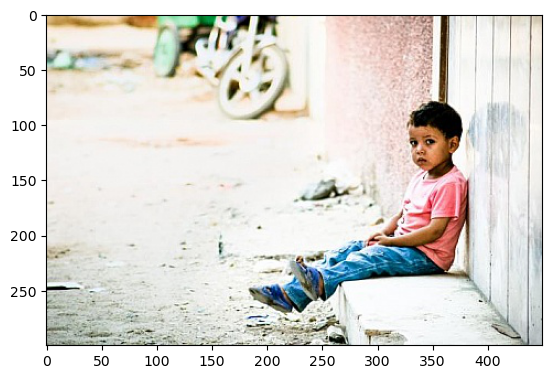

In [20]:
pred_image('neg/image_782.jpg')

In [21]:
df_results[df_results.pos<0.5]

,name,pos,neg
0,../data2/test\neg\image_782.jpg,2.419998e-06,0.999985
2,../data2/test\pos\helmet_jacket_08715.jpg,4.974043e-22,1.000000
3,../data2/test\neg\image_272.jpg,1.855873e-11,1.000000
4,../data2/test\pos\helmet_jacket_08494.jpg,5.821980e-03,0.974513
6,../data2/test\pos\helmet_jacket_07564.jpg,1.156370e-10,1.000000
...,...,...,...
3623,../data2/test\neg\image_857.jpg,1.302342e-03,0.970425
3624,../data2/test\neg\image_1218.jpg,2.319920e-17,1.000000
3625,../data2/test\neg\image_2214.jpg,3.130202e-06,0.999860
3626,../data2/test\neg\image_1568.jpg,1.386884e-02,0.977114


In [22]:
df_results['lab_pos'] = df_results.name.str.contains('pos')

In [23]:
false_pos = df_results[df_results['lab_pos'] & (df_results['pos']<0.5)]

In [24]:
1-(len(false_pos)/len(df_results))

0.6822816202810691

In [25]:
false_pos.sort_values('pos')

,name,pos,neg,lab_pos
1648,../data2/test\pos\helmet_jacket_08687.jpg,0.000000e+00,1.000000,True
1722,../data2/test\pos\helmet_jacket_07910.jpg,3.684908e-37,1.000000,True
2113,../data2/test\pos\helmet_jacket_08053.jpg,1.788778e-36,1.000000,True
2864,../data2/test\pos\helmet_jacket_08647.jpg,7.002877e-35,1.000000,True
165,../data2/test\pos\helmet_jacket_08339.jpg,1.861904e-33,1.000000,True
...,...,...,...,...
3530,../data2/test\pos\helmet_jacket_08564.jpg,4.573290e-01,0.541378,True
3184,../data2/test\pos\helmet_jacket_08202.jpg,4.683543e-01,0.042272,True
440,../data2/test\pos\helmet_jacket_08457.jpg,4.788091e-01,0.528484,True
510,../data2/test\pos\helmet_jacket_08337.jpg,4.804286e-01,0.995183,True


Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step

Predicted Class: neg

Confidence Score: 0.9984105825424194


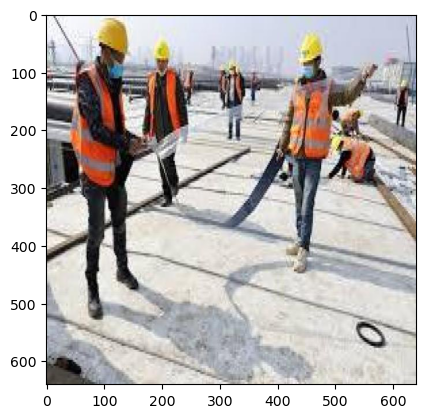

In [26]:
pred_image('pos\helmet_jacket_08687.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step

Predicted Class: pos

Confidence Score: 0.9999978542327881


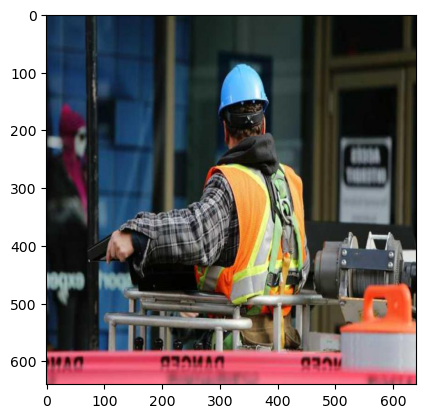

In [27]:
pred_image('pos\helmet_jacket_07910.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step

Predicted Class: pos

Confidence Score: 0.9982416033744812


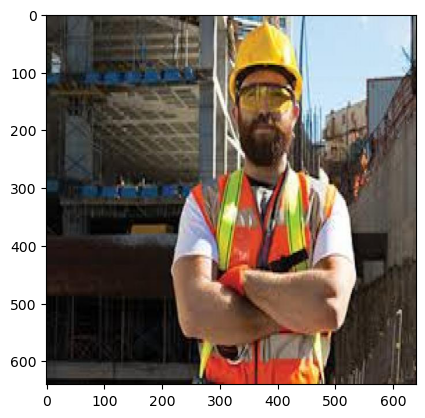

In [28]:
pred_image('pos\helmet_jacket_08337.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step

Predicted Class: neg

Confidence Score: 0.48096099495887756


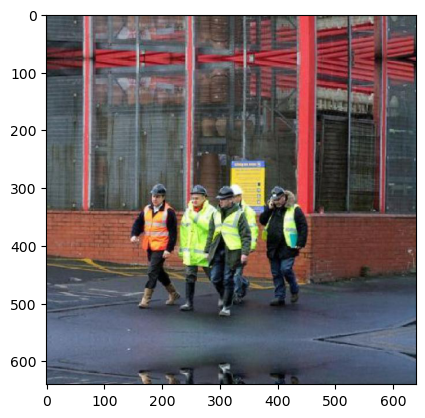

In [29]:
pred_image('pos\helmet_jacket_08493.jpg')

In [30]:
false_neg = df_results[(df_results['lab_pos'] == False) & (df_results['neg']<0.5)]

In [31]:
1-(len(false_neg)/len(df_results))

0.8255717828602921

In [32]:
false_neg.sort_values('neg')

,name,pos,neg,lab_pos
916,../data2/test\neg\image_399.jpg,1.000000,8.374666e-20,False
2607,../data2/test\neg\image_2057.jpg,1.000000,2.038429e-18,False
3241,../data2/test\neg\image_2273.jpg,1.000000,3.821924e-18,False
3422,../data2/test\neg\image_859.jpg,1.000000,8.397681e-17,False
2253,../data2/test\neg\image_338.jpg,1.000000,4.945945e-15,False
...,...,...,...,...
2000,../data2/test\neg\image_1011.jpg,0.182342,4.781797e-01,False
2461,../data2/test\neg\image_1428.jpg,0.065458,4.783774e-01,False
3608,../data2/test\neg\image_117.jpg,0.108694,4.806716e-01,False
2405,../data2/test\neg\image_2334.jpg,0.313841,4.819780e-01,False


Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step

Predicted Class: neg

Confidence Score: 1.0


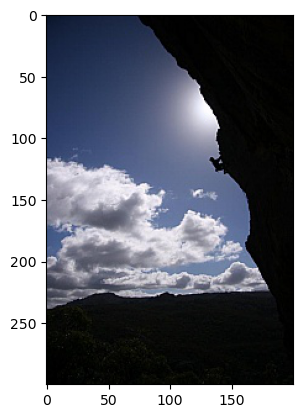

In [33]:
pred_image('neg\image_399.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step

Predicted Class: neg

Confidence Score: 0.9999998211860657


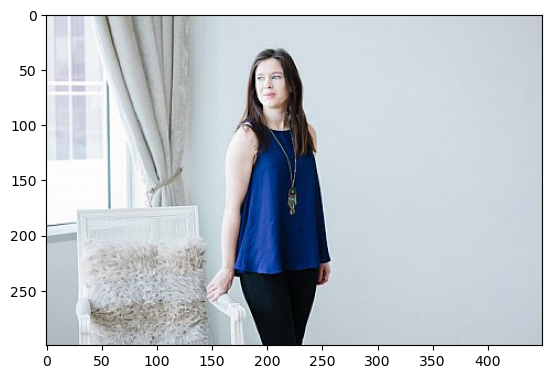

In [34]:
pred_image('neg\image_2057.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step

Predicted Class: neg

Confidence Score: 0.8210556507110596


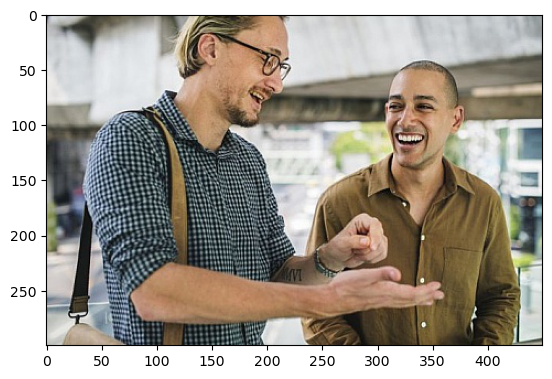

In [35]:
pred_image('neg\image_2334.jpg')

In [36]:
# Creating a Dataset for the Training data
test2 = tf.keras.utils.image_dataset_from_directory(
    "../data",  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['pos', 'neg'], #extensions of the folders holding the classes
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (400, 400), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

Found 355 files belonging to 2 classes.


In [37]:
preds2 = model.predict(test2)  # Running model on the test dataset
val_loss, val_acc = model.evaluate(test2) # Obtaining Loss and Accuracy on the val dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7996 - loss: 93.5594

Validation Loss:  85.66947174072266

Validation Accuracy:  81.0 %


In [ ]:
model.load_weights(